In [2]:
# Importing libraries
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 
import math
import  cv2

# model
import keras
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# Loading dataset

# X = np.genfromtxt("Training_Data.csv", delimiter =',')  
# Y = np.genfromtxt("Training_Labels.csv", delimiter =',')  

train_X = np.load("online_dataset/train_X.npy")
train_Y = np.load("online_dataset/train_y.npy")
test_X = np.load("online_dataset/test_X.npy")
test_Y = np.load("online_dataset/test_y.npy")

In [ ]:
#del train_X_new

In [3]:
# CNN Preprocessing for online dataset 

train_X_new = np.empty((train_X.shape[0], 45,80))
index = 0

for record in train_X:    
    sample = cv2.cvtColor(np.reshape(record, (45,80, 3)), cv2.COLOR_BGR2GRAY)
    #sample = sample.reshape((1,45*80))
    sample = (np.asfarray(sample)/ 255.0) 
    if index < train_X.shape[0]:
        train_X_new[index, :, :] = sample
    index = index + 1

test_X_new = np.empty((test_X.shape[0], 45,80))
index = 0

for record in test_X:    
    sample = cv2.cvtColor(np.reshape(record, (45,80, 3)), cv2.COLOR_BGR2GRAY)
    #sample = sample.reshape((1,45*80))
    sample = (np.asfarray(sample)/ 255.0) 
    if index < test_X.shape[0]:
        test_X_new[index, :] = sample
    index = index + 1

In [7]:
sample.shape

(45, 80)

In [12]:
# Correcting nomenclature

train_X_old = train_X
test_X_old = test_X
train_X = train_X_new
test_X = test_X_new
print("train_X_old.shape, test_X_old.shape, train_X.shape, test_X.shape")
print(train_X_old.shape, test_X_old.shape, train_X.shape, test_X.shape)

train_X_old.shape, test_X_old.shape, train_X.shape, test_X.shape
(102496, 45, 80, 1) (1000, 45, 80, 1) (102496, 45, 80) (1000, 45, 80)


In [ ]:
print(train_X.shape, test_X.shape, train_Y.shape, test_Y.shape)

train_X, valid_X, train_Y, valid_Y = train_test_split(train_X, train_Y, test_size=0.2, random_state=13)
print(train_X.shape, valid_X.shape, train_Y.shape, valid_Y.shape)

In [ ]:
train_Y = to_categorical(train_Y, num_classes = 3)
valid_Y = to_categorical(valid_Y, num_classes = 3)

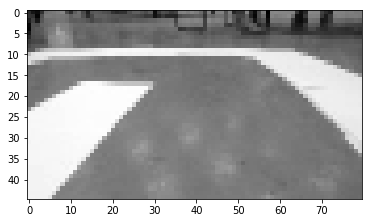

In [17]:
train_X[1].shape, test_X.shape

plt.imshow(train_X[1], cmap="gray")
plt.show()


In [5]:
train_X = train_X.reshape(train_X.shape[0], 45,80,1)
test_X = test_X.reshape(test_X.shape[0], 45,80,1)
#valid_X = valid_X.reshape(valid_X.shape[0], 45,80,1)

In [ ]:
del model

In [3]:
# Lets start defining our model
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(45, 80, 1), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='valid'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='valid'))

# We flatten our data in order to feed it through the dense(output) layer
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(3, activation='linear'))

# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])


In [5]:
41*76*64

199424

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 45, 80, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 43, 78, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 41, 76, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 199424)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               102105600 
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1539      
Total params: 102,162,883
Trainable params: 102,162,883
Non-trainable params: 0
______________________________________________________________

In [ ]:
# Fitting the CNN to the Training set
history = model.fit(train_X, train_Y, batch_size = 5, epochs = epochs, validation_data=(valid_X, valid_Y))

In [ ]:
# Evaluate using Test data
test_Y_ = to_categorical(test_Y)
scores = model.evaluate(test_X, test_Y_, verbose = 0)

print("%s: %.2f%%" % (model.metrics_names[0], scores[0]))
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
model.save('CNN_model_1.h5')